#Importing python libraries & Data cleaning & preprocessing:

#DATFRAME: ECG_SIGNAL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SequentialFeatureSelector
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_text
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
ecg_df = pd.read_csv('Dataframe_ECGsignal.csv')
ecg_df.head(10)

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
0,1,379,788.448549,76.492247,5.554568,24.140212,56.312050,33.645640,23.467771,8.730159,...,9.127375,35.386024,64.613976,0.547653,16628.503018,23.790554,75.878758,3.189449,1.317064,-1.0
1,1,41,709.195122,85.378220,8.033552,22.500000,70.404978,28.694076,18.034156,10.000000,...,9.339315,34.448705,65.551295,0.525523,20076.799931,20.189447,95.378057,4.724154,0.875469,209.0
2,1,221,806.058824,74.636723,3.873437,22.600000,42.029223,28.815400,17.917212,5.909091,...,9.138723,35.567556,64.432444,0.552013,16940.954772,20.374770,55.541974,2.726017,1.571471,309.0
3,2,378,789.243386,76.823032,8.294635,49.655172,79.254143,82.813747,66.363866,30.769231,...,9.204025,33.320305,66.679695,0.499707,17331.456245,58.558162,95.315830,1.627712,1.413580,-1.0
4,2,40,730.800000,82.442370,5.380247,25.615385,47.555743,32.193725,19.755899,12.820513,...,9.319440,34.997279,65.002721,0.538397,19876.971286,22.752260,63.100074,2.773354,inf,209.0
5,2,222,806.202703,75.091770,7.454646,55.886878,74.809679,79.680272,56.923321,44.343891,...,9.236105,33.390208,66.609792,0.501281,17913.202176,56.342292,89.411923,1.586942,1.662927,108.0
6,3,389,768.434447,78.455372,5.455468,33.574742,53.156683,43.640902,27.915470,24.226804,...,9.156875,34.336119,65.663881,0.522907,16831.017156,30.858775,68.519106,2.220409,1.546245,-1.0
7,3,38,743.157895,81.595986,8.265672,45.837838,79.954219,59.475182,38.419840,37.837838,...,9.353887,34.332356,65.667644,0.522820,20317.013029,42.037515,104.609036,2.488469,1.466337,209.0
8,3,233,765.360515,79.172665,8.081717,35.193966,74.433369,45.246309,28.497609,26.293103,...,9.198059,34.096073,65.903927,0.517360,17457.669357,31.992310,100.145856,3.130310,1.427967,309.0
9,4,381,768.283465,78.993268,8.552101,41.268421,81.485604,55.093509,36.547602,33.684211,...,9.183292,34.674924,65.325076,0.530806,17287.478662,38.956891,108.437666,2.783530,1.409730,-1.0


In [ ]:
ecg_df.info()
type(ecg_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patien ID             426 non-null    int64  
 1   NNI counter           426 non-null    int64  
 2   NNI mean              426 non-null    float64
 3   HR mean               426 non-null    float64
 4   HR std                426 non-null    float64
 5   NNI diff mean         426 non-null    float64
 6   SDNN                  426 non-null    float64
 7   RMSSD                 426 non-null    float64
 8   SDSD                  426 non-null    float64
 9   pnn50                 426 non-null    float64
 10  pnn20                 426 non-null    float64
 11  TRI Index             426 non-null    float64
 12  Welch LogPower VLF    426 non-null    float64
 13  Welch LogPower LF     426 non-null    float64
 14  Welch LogPower HF     426 non-null    float64
 15  Welch NormPower LF    4

pandas.core.frame.DataFrame

In [ ]:
ecg_df.describe()

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,71.500000,229.842723,725.200503,85.550724,7.422686,25.901542,61.065246,35.548384,23.972448,13.229857,...,9.193936,35.019848,64.980152,0.539113,17717.076340,25.068247,81.009650,3.845825,inf,151.931925
std,41.039049,153.087798,116.718220,13.554808,3.810273,15.379412,25.818338,22.768906,17.548837,14.669954,...,0.097562,0.708691,0.708691,0.016713,1528.788961,16.126677,33.998314,1.782814,NaN,121.693047
min,1.000000,25.000000,448.292308,54.100161,1.782548,3.656250,15.312139,5.147815,3.652435,0.000000,...,8.996039,31.695464,62.625243,0.464032,14873.872359,3.423266,19.181090,1.217043,0.135102,-1.000000
25%,36.000000,48.000000,640.069841,76.048456,5.051572,14.592391,42.767282,19.910661,12.976254,1.970205,...,9.112750,34.622675,64.524659,0.529582,16479.850806,14.016304,57.423330,2.728641,0.916291,-1.000000
50%,71.500000,239.500000,720.512500,84.166234,6.754538,22.220853,56.026538,29.584684,19.020444,7.701576,...,9.176565,34.979935,65.020065,0.537987,17307.045697,20.903230,73.066993,3.482087,1.256038,209.000000
75%,107.000000,365.000000,793.882692,94.542527,8.577019,32.541973,73.427228,44.129723,27.906674,20.159574,...,9.287755,35.475341,65.377325,0.549795,19230.009896,31.125572,98.030108,4.529068,1.506427,209.000000
max,142.000000,584.000000,1118.666667,134.227002,41.262452,111.827684,173.175827,195.900838,161.074512,75.000000,...,9.423615,37.374757,68.304536,0.596800,21628.130192,138.522533,216.168967,15.559685,inf,309.000000


In [ ]:
ecg_df.columns

Index(['Patien ID', 'NNI counter', 'NNI mean', 'HR mean', 'HR std',
       'NNI diff mean', 'SDNN', 'RMSSD', 'SDSD', 'pnn50', 'pnn20', 'TRI Index',
       'Welch LogPower VLF', 'Welch LogPower LF', 'Welch LogPower HF',
       'Welch NormPower LF', 'Welch NormPower HF', 'Welch LF/HF',
       'Welch TotPower', 'AutoReg LogPower VLF', 'AutoReg LogPower LF',
       'AutoReg LogPower HF', 'AutoReg NormPower LF', 'AutoReg NormPower HF',
       'AutoReg LF/HF', 'AutoReg TotPower', 'SD1', 'SD2', 'SD1/SD2',
       'SampEntropy', 'Label'],
      dtype='object')

In [ ]:
ecg_df.shape

(426, 31)

In [ ]:
ecg_df.isnull().sum()

Patien ID               0
NNI counter             0
NNI mean                0
HR mean                 0
HR std                  0
NNI diff mean           0
SDNN                    0
RMSSD                   0
SDSD                    0
pnn50                   0
pnn20                   0
TRI Index               0
Welch LogPower VLF      0
Welch LogPower LF       0
Welch LogPower HF       0
Welch NormPower LF      0
Welch NormPower HF      0
Welch LF/HF             0
Welch TotPower          0
AutoReg LogPower VLF    0
AutoReg LogPower LF     0
AutoReg LogPower HF     0
AutoReg NormPower LF    0
AutoReg NormPower HF    0
AutoReg LF/HF           0
AutoReg TotPower        0
SD1                     0
SD2                     0
SD1/SD2                 0
SampEntropy             0
Label                   0
dtype: int64

In [ ]:
# Convert the entire DataFrame to float
ecg_df = ecg_df.astype(float)
ecg_df


,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
0,1.0,379.0,788.448549,76.492247,5.554568,24.140212,56.312050,33.645640,23.467771,8.730159,...,9.127375,35.386024,64.613976,0.547653,16628.503018,23.790554,75.878758,3.189449,1.317064,-1.0
1,1.0,41.0,709.195122,85.378220,8.033552,22.500000,70.404978,28.694076,18.034156,10.000000,...,9.339315,34.448705,65.551295,0.525523,20076.799931,20.189447,95.378057,4.724154,0.875469,209.0
2,1.0,221.0,806.058824,74.636723,3.873437,22.600000,42.029223,28.815400,17.917212,5.909091,...,9.138723,35.567556,64.432444,0.552013,16940.954772,20.374770,55.541974,2.726017,1.571471,309.0
3,2.0,378.0,789.243386,76.823032,8.294635,49.655172,79.254143,82.813747,66.363866,30.769231,...,9.204025,33.320305,66.679695,0.499707,17331.456245,58.558162,95.315830,1.627712,1.413580,-1.0
4,2.0,40.0,730.800000,82.442370,5.380247,25.615385,47.555743,32.193725,19.755899,12.820513,...,9.319440,34.997279,65.002721,0.538397,19876.971286,22.752260,63.100074,2.773354,inf,209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,141.0,37.0,776.621622,77.799390,6.460621,35.277778,67.223240,44.813812,28.028160,36.111111,...,9.361415,34.526841,65.473159,0.527343,20506.975817,31.638804,84.701236,2.677131,1.386294,209.0
422,141.0,201.0,888.263682,68.372099,11.900024,34.015000,70.971439,65.310221,55.892977,16.500000,...,9.222499,34.247917,65.752083,0.520864,17905.538779,46.180180,88.962420,1.926420,1.419817,108.0
423,142.0,382.0,780.811518,77.937091,9.644660,45.335958,89.375295,63.029156,43.844852,33.070866,...,9.194857,34.430237,65.569763,0.525093,17463.325152,44.568291,117.993820,2.647484,1.299780,-1.0
424,142.0,54.0,537.129630,113.451455,13.537283,12.339623,71.166042,16.774869,11.472280,1.886792,...,9.284477,34.812315,65.187685,0.534032,19158.719914,11.587594,98.082551,8.464445,0.416160,209.0


In [ ]:
ecg_df['SampEntropy'] = ecg_df['SampEntropy'].fillna(ecg_df['SampEntropy'].mean())

In [ ]:
ecg_df['Patien ID']  = ecg_df['Patien ID'].astype('float64')
ecg_df['NNI counter']  = ecg_df['NNI counter'].astype('float64')

In [ ]:
def detect_outliers(df, feature_name):
  Q1 = df[feature_name].quantile(0.25)
  Q3 = df[feature_name].quantile(0.75)

  IQR = Q3- Q1

  lwr_bound = Q1-1.5 * IQR
  upp_bound = Q3+1.5*   IQR

  ls = df.index[np.logical_or(df[feature_name]<lwr_bound, df[feature_name]>upp_bound)]

  return ls

In [ ]:

outliers_detected = {}
for i in ecg_df.columns:
  outliers = detect_outliers(ecg_df, i)
  outliers_detected[i] = outliers

  print('variable', i)
  print(outliers)
  print(ecg_df[i].iloc[outliers])
  print('\n')

variable Patien ID
Int64Index([], dtype='int64')
Series([], Name: Patien ID, dtype: float64)


variable NNI counter
Int64Index([], dtype='int64')
Series([], Name: NNI counter, dtype: float64)


variable NNI mean
Int64Index([], dtype='int64')
Series([], Name: NNI mean, dtype: float64)


variable HR mean
Int64Index([], dtype='int64')
Series([], Name: HR mean, dtype: float64)


variable HR std
Int64Index([106, 158, 190, 217, 283, 317, 424], dtype='int64')
106    13.464926
158    13.747919
190    13.475282
217    13.090894
283    13.275487
317    13.746328
424    13.537283
Name: HR std, dtype: float64


variable NNI diff mean
Int64Index([5, 191, 278, 333, 335], dtype='int64')
5      55.886878
191    57.976744
278    55.067485
333    54.775216
335    55.952381
Name: NNI diff mean, dtype: float64


variable SDNN
Int64Index([47, 74, 158, 185, 292], dtype='int64')
47     113.547550
74     116.431842
158    114.539459
185    112.605045
292    118.137190
Name: SDNN, dtype: float64


variable RMS

In [ ]:
print('Outliers detected with IQR method:',list(outliers_detected))

Outliers detected with IQR method: ['Patien ID', 'NNI counter', 'NNI mean', 'HR mean', 'HR std', 'NNI diff mean', 'SDNN', 'RMSSD', 'SDSD', 'pnn50', 'pnn20', 'TRI Index', 'Welch LogPower VLF', 'Welch LogPower LF', 'Welch LogPower HF', 'Welch NormPower LF', 'Welch NormPower HF', 'Welch LF/HF', 'Welch TotPower', 'AutoReg LogPower VLF', 'AutoReg LogPower LF', 'AutoReg LogPower HF', 'AutoReg NormPower LF', 'AutoReg NormPower HF', 'AutoReg LF/HF', 'AutoReg TotPower', 'SD1', 'SD2', 'SD1/SD2', 'SampEntropy', 'Label']


In [ ]:
for i in ecg_df.columns:
    ecg_df[i] = ecg_df[i].replace(ecg_df[i].iloc[outliers_detected[i]].values,ecg_df[i].median())
    print(ecg_df[i])

0        1.0
1        1.0
2        1.0
3        2.0
4        2.0
       ...  
421    141.0
422    141.0
423    142.0
424    142.0
425    142.0
Name: Patien ID, Length: 426, dtype: float64
0      379.0
1       41.0
2      221.0
3      378.0
4       40.0
       ...  
421     37.0
422    201.0
423    382.0
424     54.0
425    209.0
Name: NNI counter, Length: 426, dtype: float64
0      788.448549
1      709.195122
2      806.058824
3      789.243386
4      730.800000
          ...    
421    776.621622
422    888.263682
423    780.811518
424    537.129630
425    851.684211
Name: NNI mean, Length: 426, dtype: float64
0       76.492247
1       85.378220
2       74.636723
3       76.823032
4       82.442370
          ...    
421     77.799390
422     68.372099
423     77.937091
424    113.451455
425     72.571498
Name: HR mean, Length: 426, dtype: float64
0       5.554568
1       8.033552
2       3.873437
3       8.294635
4       5.380247
         ...    
421     6.460621
422    11.900024
423

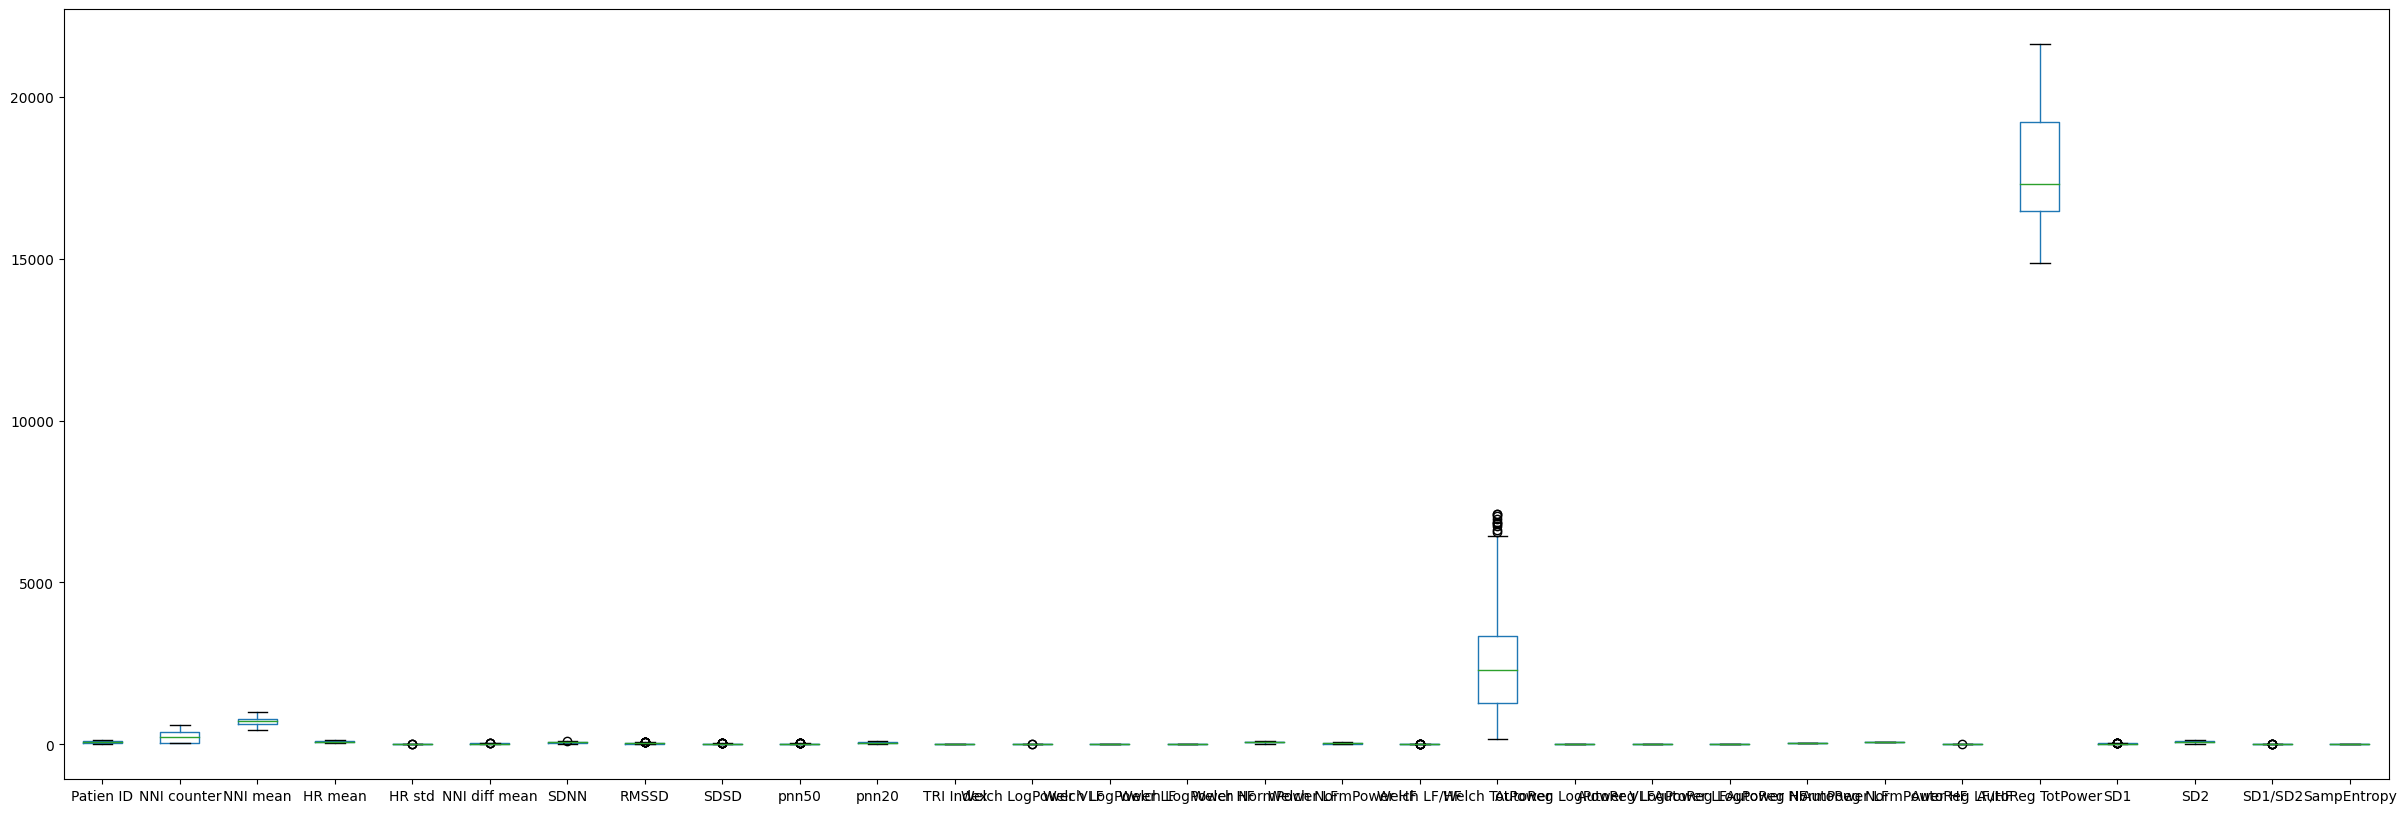

In [ ]:
plt.figure(figsize=(30,10))
ecg_df.iloc[:,0:-1].boxplot(grid=False)
plt.show()

#Normalisation of Features :


In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(ecg_df)
name=ecg_df.columns
df = pd.DataFrame(df,columns=name)

In [ ]:
X = df.iloc[:,0:-1]
Y = df['Label']

#Correlation Analysis:

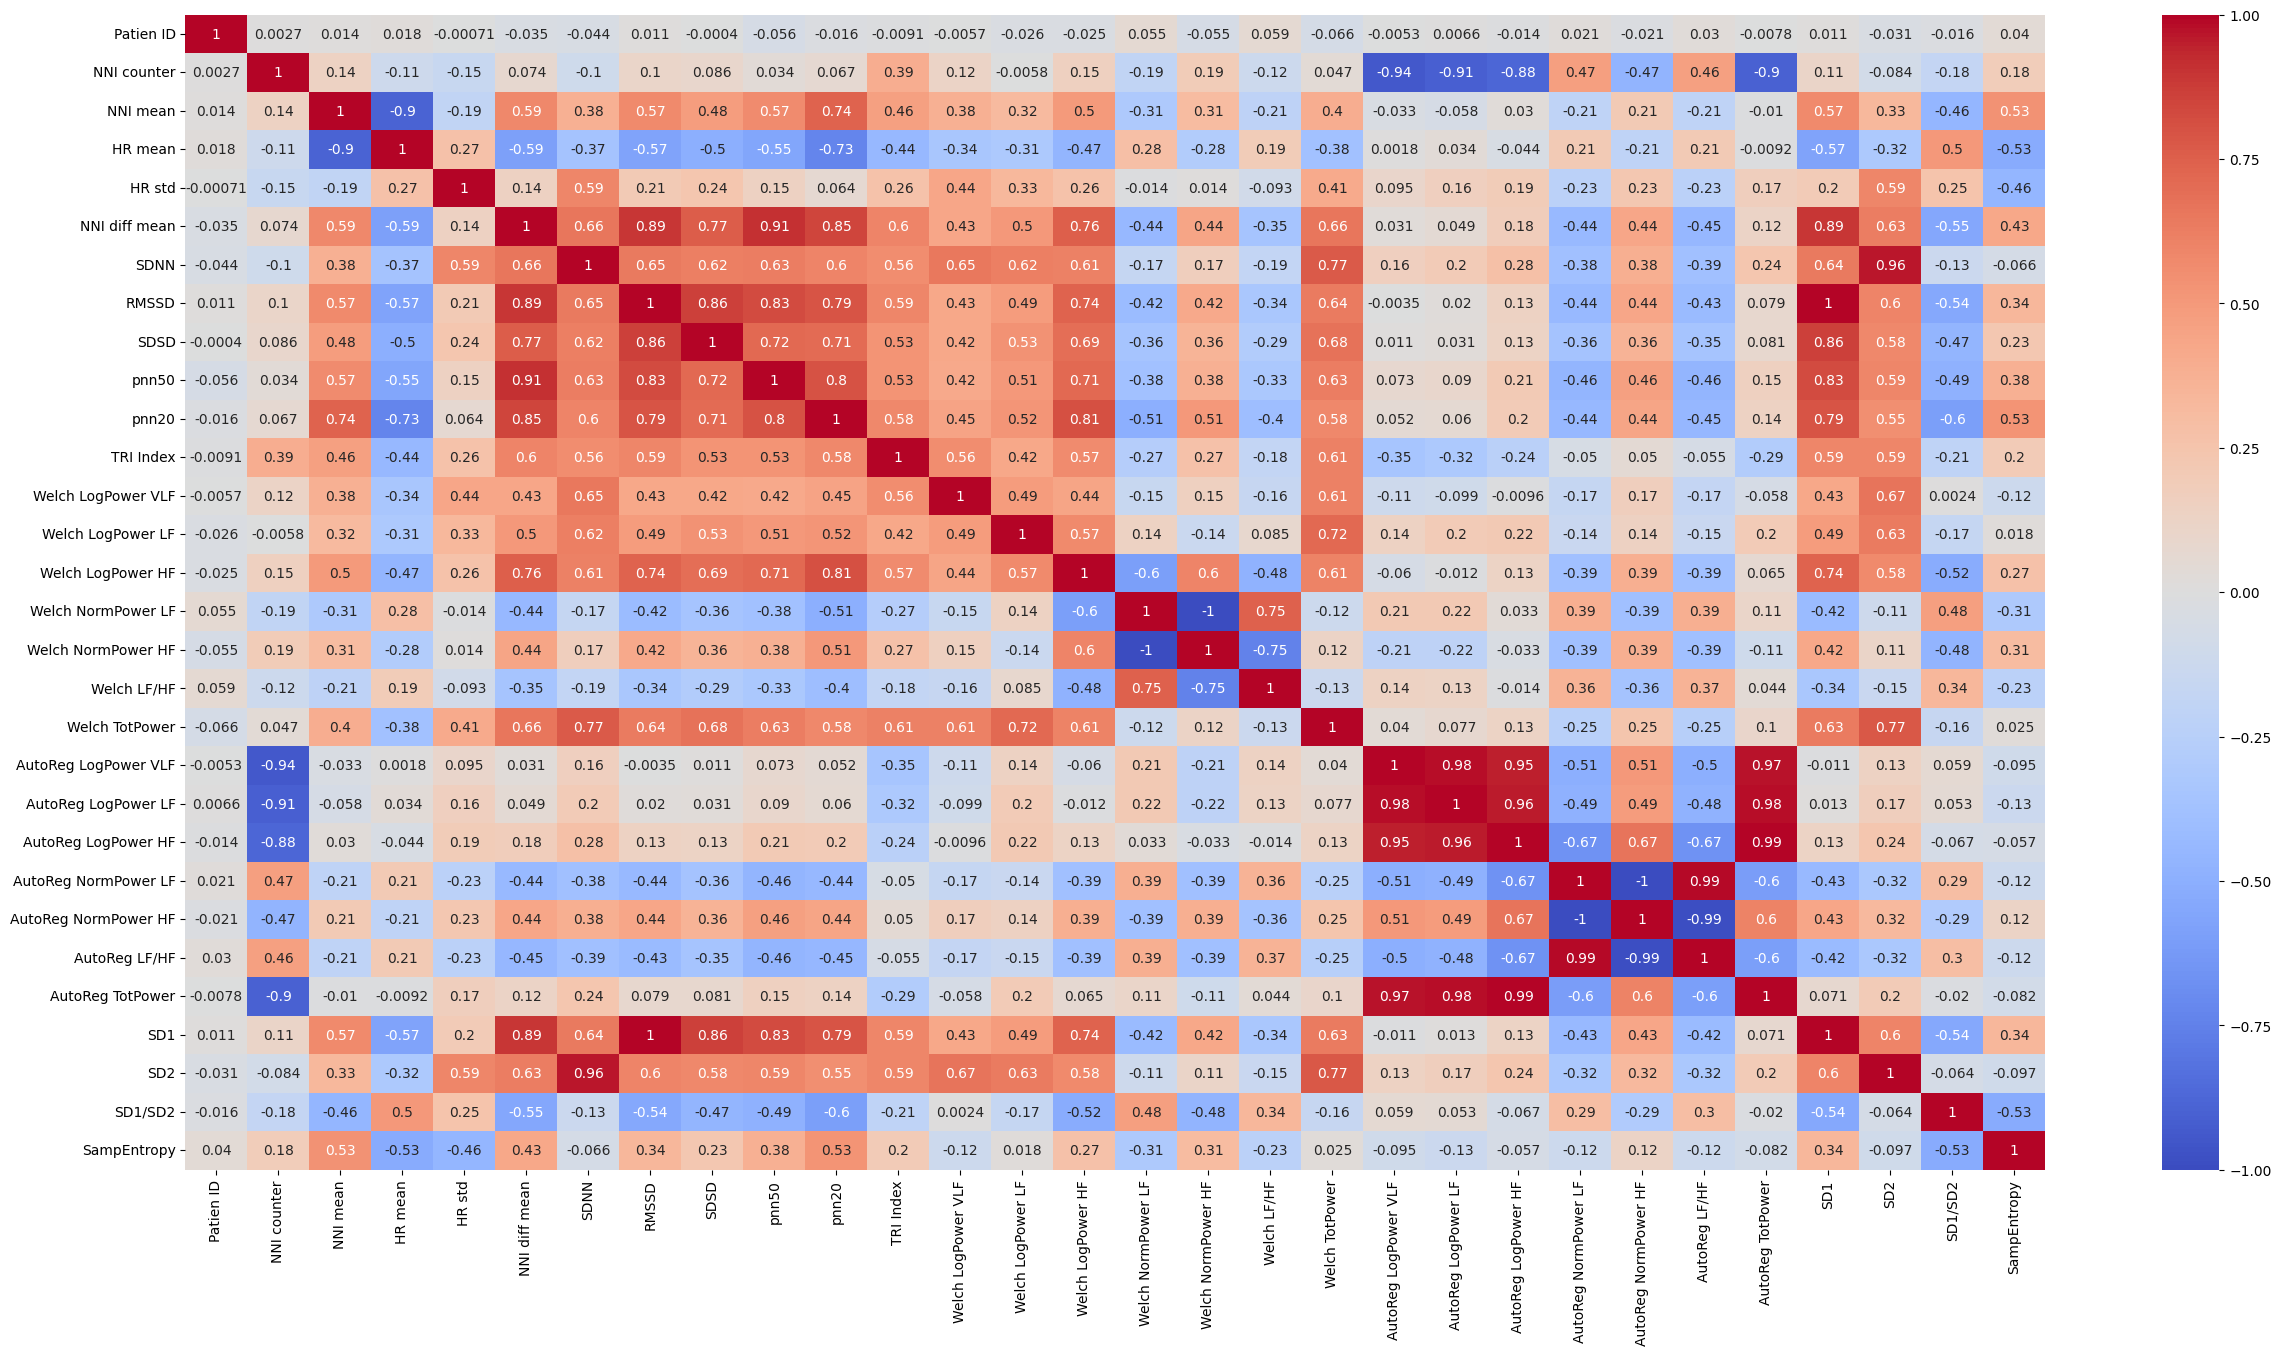

In [ ]:
corrmat = X.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corrmat,annot=True,cmap="coolwarm")
plt.show()

In [ ]:
X = X.drop(X.columns[X.min() < -0.5],axis=1)

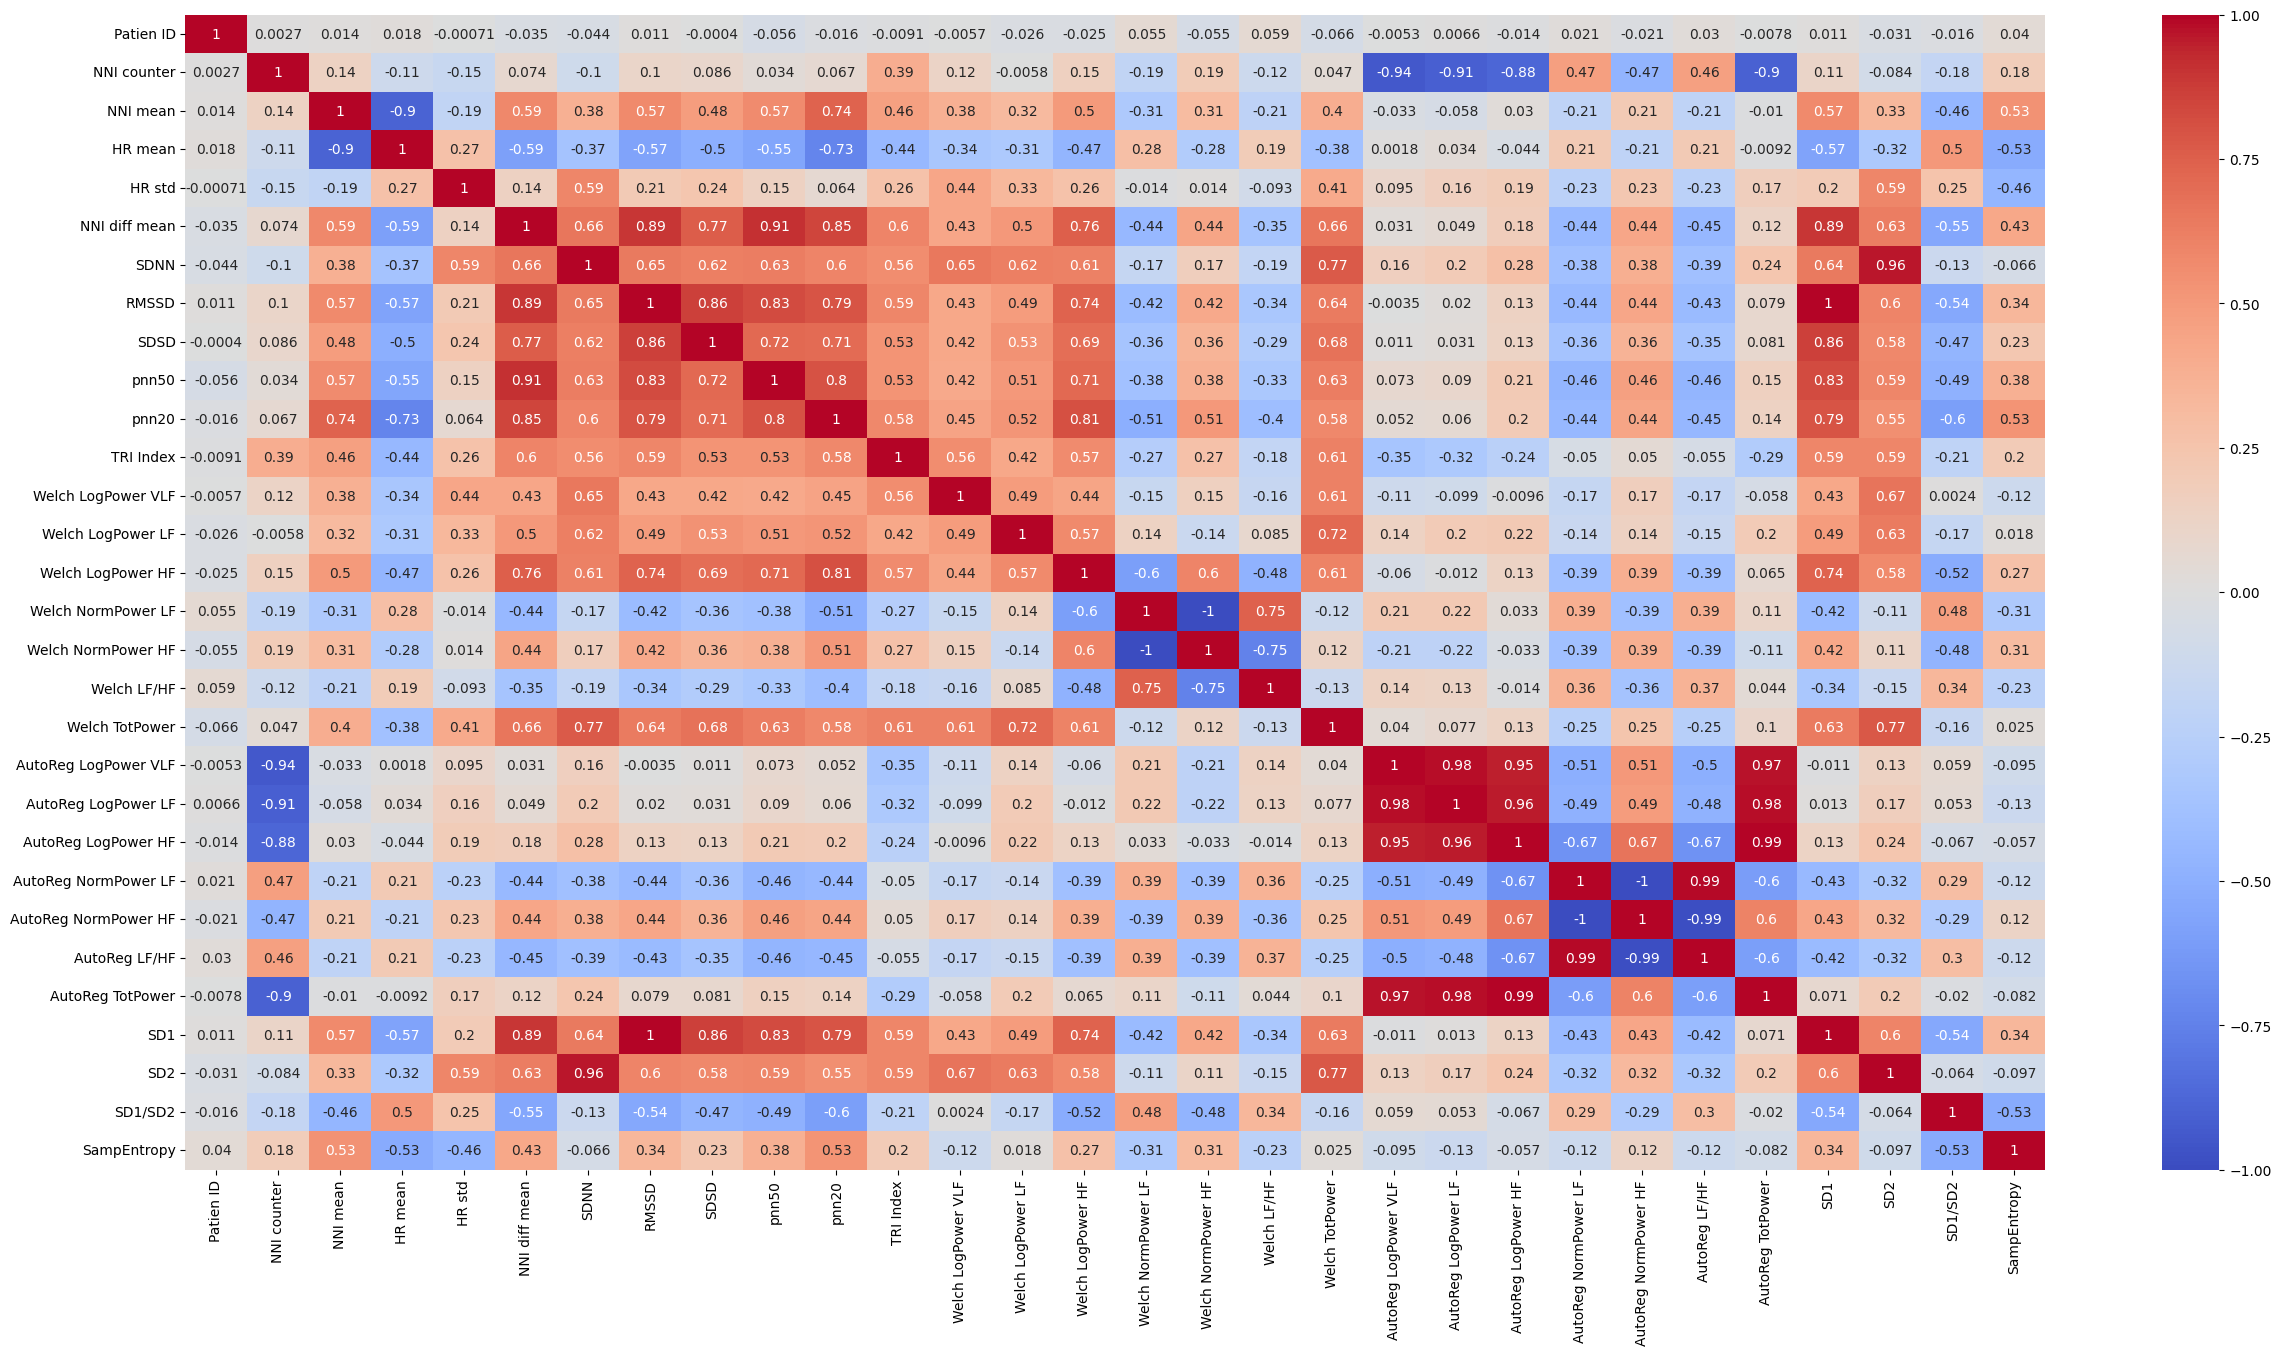

In [ ]:
corrmat = X.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corrmat,annot=True,cmap="coolwarm")
plt.show()

In [ ]:
np.fill_diagonal(corrmat.values,val=0)
pos = corrmat[corrmat > 0]

In [ ]:
x = 0.7             # x is threshold value
corr = pos[pos>x]

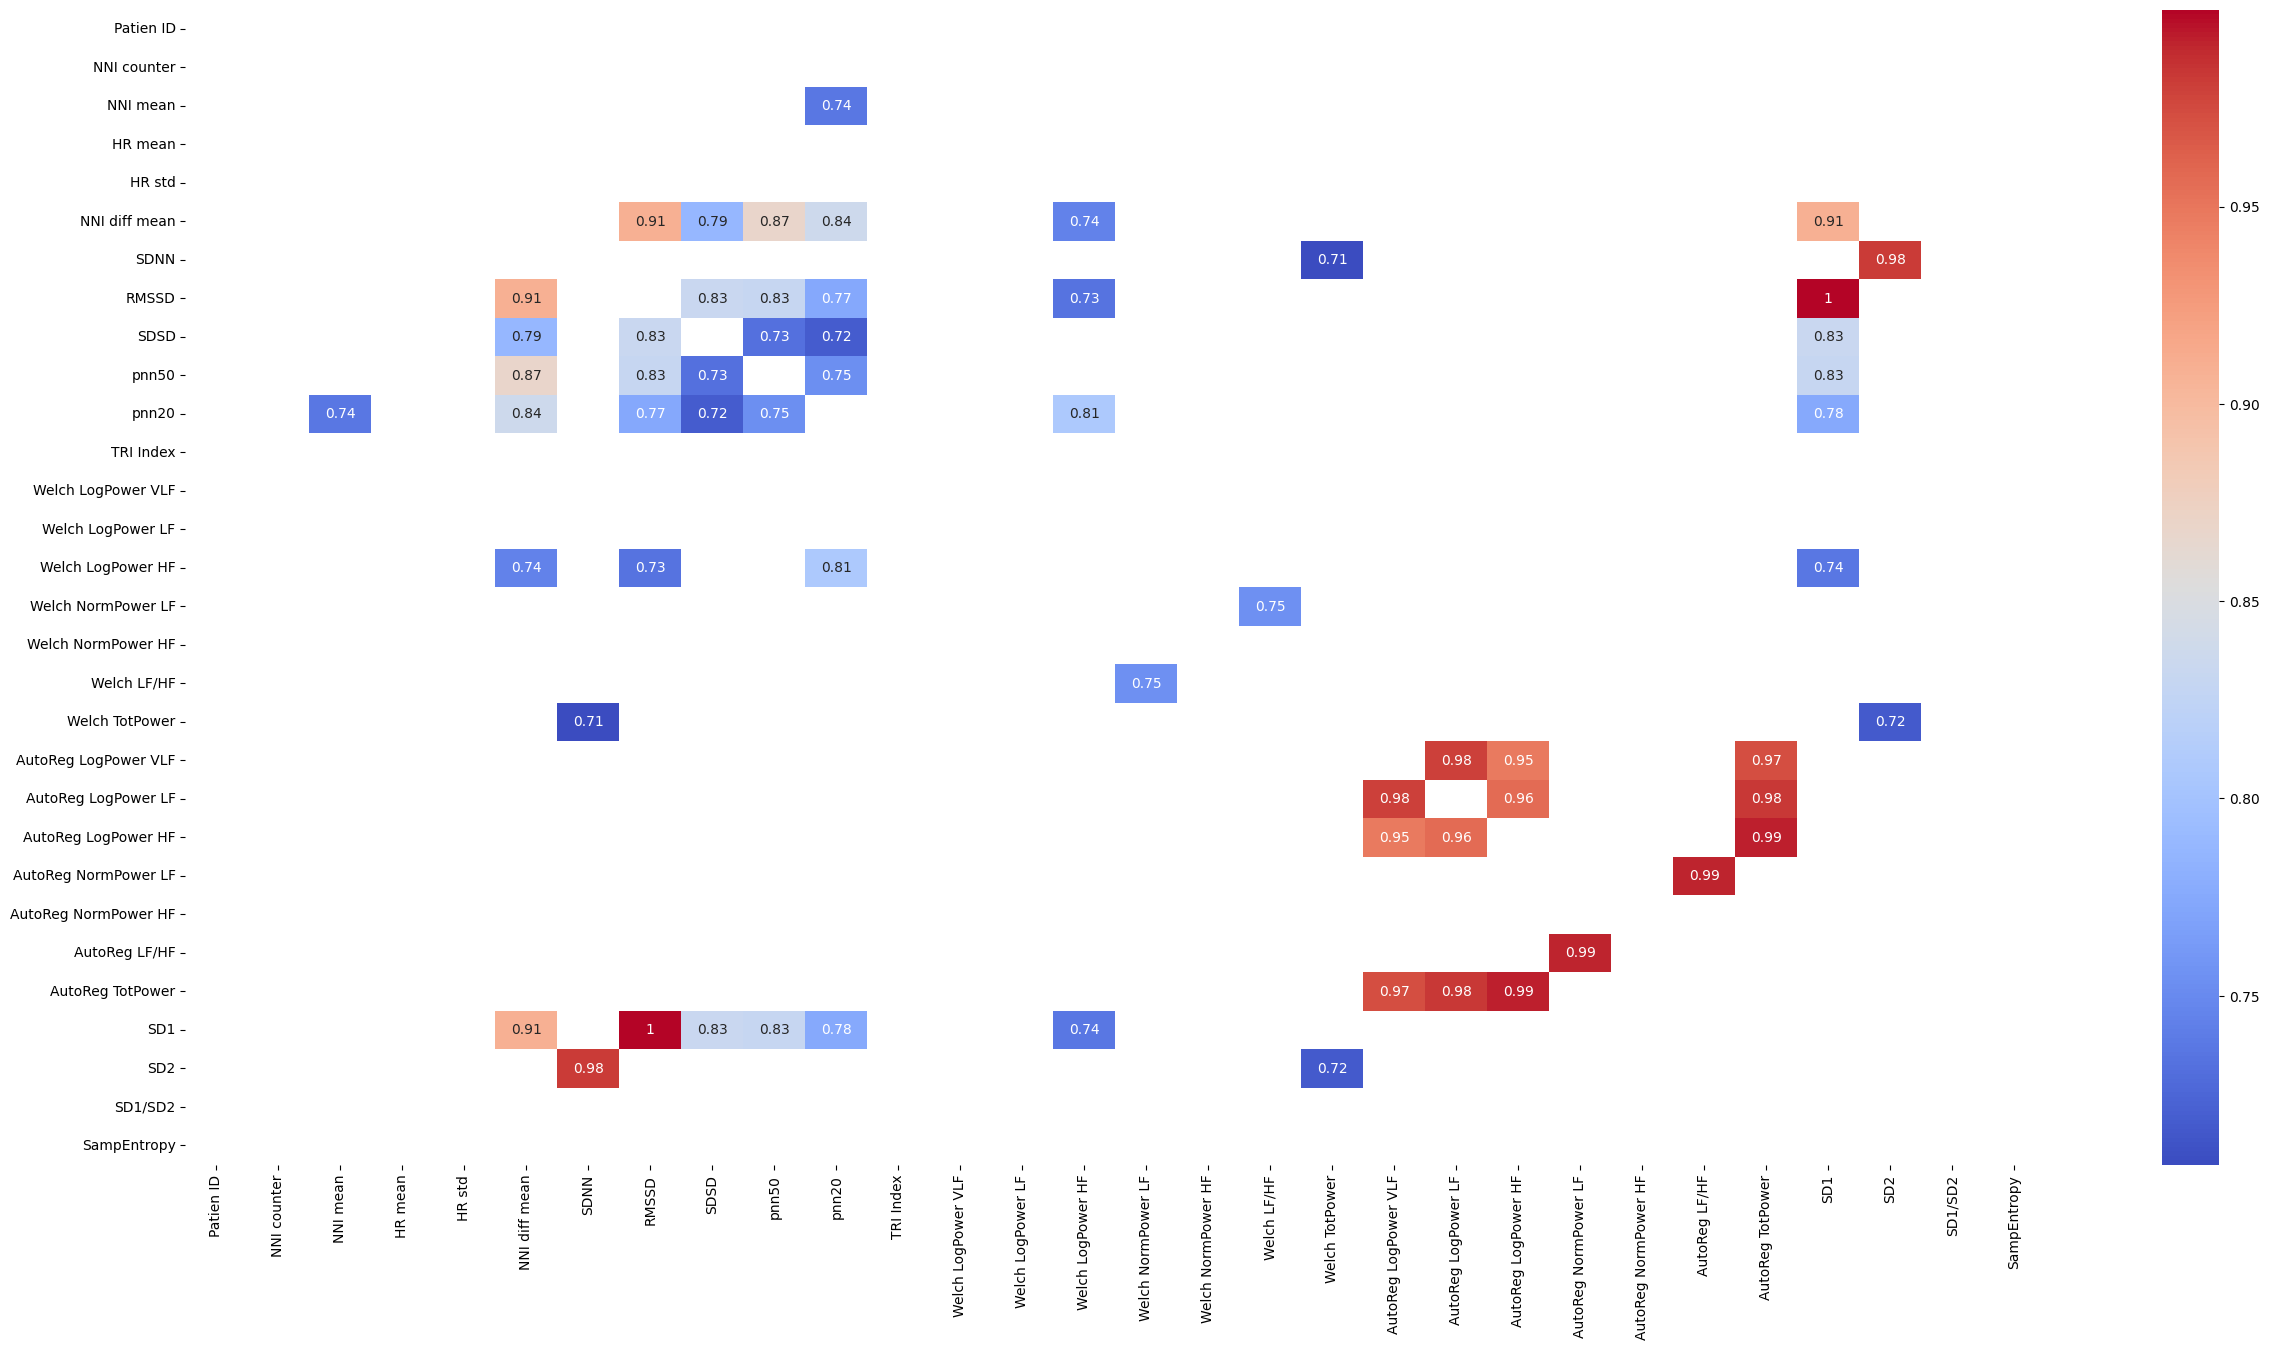

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [ ]:
features = corr.dropna(axis=0,how='all').columns

In [ ]:
ind = np.where(corr>0.7)
correlated_feature = list(X.columns[ind[0]])

In [ ]:
list(set(correlated_feature))

['pnn20',
 'SD2',
 'pnn50',
 'Welch LogPower HF',
 'NNI diff mean',
 'Welch LF/HF',
 'RMSSD',
 'AutoReg LogPower LF',
 'Welch NormPower LF',
 'AutoReg LogPower VLF',
 'AutoReg LF/HF',
 'AutoReg LogPower HF',
 'AutoReg NormPower LF',
 'AutoReg TotPower',
 'Welch TotPower',
 'SDSD',
 'SDNN',
 'NNI mean',
 'SD1']

In [ ]:
x_new = X.get(['RMSSD',
 'SD1',
 'Welch LF/HF',
 'AutoReg NormPower LF',
 'SD2',
 'NNI mean',
 'SDNN',
 'AutoReg TotPower',
 'pnn50',
 'Welch LogPower HF',
 'NNI diff mean',
 'SDSD',
 'Welch TotPower',
 'AutoReg LogPower LF',
 'AutoReg LF/HF',
 'Welch LogPower LF',
 'Welch NormPower LF',
 'AutoReg LogPower VLF',
 'AutoReg LogPower HF',
 'pnn20'])

In [ ]:
x_new

,RMSSD,SD1,Welch LF/HF,AutoReg NormPower LF,SD2,NNI mean,SDNN,AutoReg TotPower,pnn50,Welch LogPower HF,NNI diff mean,SDSD,Welch TotPower,AutoReg LogPower LF,AutoReg LF/HF,Welch LogPower LF,Welch NormPower LF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.382355,0.384876,0.402774,0.621214,0.411656,0.608021,0.398735,0.259781,0.184874,0.506092,0.377095,0.426199,0.316531,0.300954,0.614954,0.631289,0.747731,0.234016,0.307163,0.490620
1,0.315920,0.316827,0.271382,0.332444,0.553231,0.466358,0.535792,0.770318,0.211765,0.386785,0.346899,0.309330,0.601227,0.806144,0.331116,0.793697,0.938535,0.767305,0.802842,0.490909
2,0.317547,0.320329,0.275471,0.677140,0.264000,0.639499,0.259830,0.306041,0.125134,0.459353,0.348740,0.306814,0.192248,0.358013,0.670880,0.480303,0.662543,0.414625,0.333705,0.520661
3,0.327869,0.330315,0.114439,0.496106,0.552780,0.609442,0.621852,0.363857,0.651584,0.750140,0.846806,0.330543,0.715564,0.256650,0.000000,0.699032,0.427345,0.308749,0.486430,0.769713
4,0.362874,0.365256,0.523807,0.501449,0.318876,0.504976,0.313577,0.740733,0.271493,0.490381,0.404251,0.346362,0.268465,0.818953,0.496241,0.669248,0.797930,0.764517,0.756359,0.475524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.532198,0.533183,0.127158,0.356516,0.475712,0.586881,0.504849,0.834008,0.764706,0.616831,0.582129,0.524286,0.261539,0.881788,0.354466,0.533971,0.456663,0.798546,0.854529,0.636364
422,0.807197,0.807969,0.088668,0.270585,0.506650,0.786439,0.541301,0.448853,0.349412,0.621035,0.558882,0.330543,0.309349,0.434056,0.271365,0.466753,0.357458,0.442642,0.529636,0.589091
423,0.776592,0.777509,0.190335,0.326754,0.717434,0.594370,0.720283,0.383381,0.700324,0.752556,0.767293,0.864480,0.835183,0.376178,0.325605,0.809910,0.567716,0.338352,0.464988,0.712956
424,0.156000,0.154280,0.361996,0.444465,0.572868,0.158795,0.543194,0.634392,0.039956,0.320986,0.159854,0.168193,0.181977,0.691383,0.440255,0.347695,0.725248,0.641540,0.674590,0.164666


In [ ]:
model = LabelEncoder()
y = model.fit_transform(Y)
y

array([0, 2, 4, 0, 2, 1, 0, 2, 4, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 4, 0,
       2, 3, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2,
       1, 0, 2, 4, 0, 2, 4, 0, 2, 1, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 4,
       0, 2, 1, 0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2, 1, 0, 2, 4, 0, 2, 1, 0,
       2, 4, 0, 2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 3, 0, 2,
       4, 0, 2, 4, 0, 2, 4, 0, 2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 3, 0, 2, 4,
       0, 2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 4, 0, 2, 1, 0,
       2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2, 4, 0, 2,
       1, 0, 2, 4, 0, 2, 1, 0, 2, 1, 0, 2, 3, 0, 2, 1, 0, 2, 4, 0, 2, 4,
       0, 2, 3, 0, 2, 1, 0, 2, 3, 0, 2, 4, 0, 2, 4, 0, 2, 1, 0, 2, 3, 0,
       2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 1, 0, 2, 4, 0, 2, 1, 0, 2, 4, 0, 2,
       4, 0, 2, 4, 0, 2, 4, 0, 2, 1, 0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2, 3,
       0, 2, 3, 0, 2, 3, 0, 2, 4, 0, 2, 3, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 3, 0, 2, 4, 0, 2, 1, 0, 2, 4, 0, 2, 4, 0,

In [ ]:
ecg_df['Label']

0       -1.0
1      209.0
2      309.0
3       -1.0
4      209.0
       ...  
421    209.0
422    108.0
423     -1.0
424    209.0
425    108.0
Name: Label, Length: 426, dtype: float64

In [ ]:
test = SelectKBest(score_func = chi2, k = 10)
new_X = test.fit_transform(x_new,y)

In [ ]:
features_SKB = pd.DataFrame({'Feature':list(x_new.iloc[:,:].columns),'Ranking':test.scores_})
print(features_SKB.sort_values(by='Ranking',ascending=False))

                 Feature    Ranking
13   AutoReg LogPower LF  44.427992
7       AutoReg TotPower  41.094363
17  AutoReg LogPower VLF  39.362072
18   AutoReg LogPower HF  34.844270
5               NNI mean   4.712225
3   AutoReg NormPower LF   4.669903
14         AutoReg LF/HF   4.529646
8                  pnn50   3.852946
1                    SD1   3.469823
19                 pnn20   3.449650
16    Welch NormPower LF   3.429206
0                  RMSSD   3.300722
10         NNI diff mean   2.917535
2            Welch LF/HF   2.692238
9      Welch LogPower HF   2.675634
11                  SDSD   2.488824
12        Welch TotPower   1.501246
15     Welch LogPower LF   0.495271
4                    SD2   0.298596
6                   SDNN   0.198706


In [ ]:
features = np.array(x_new.iloc[:,:].columns)
filter = test.get_support()
filter

array([False,  True, False,  True, False,  True, False,  True,  True,
       False, False, False, False,  True,  True, False, False,  True,
        True,  True])

In [ ]:
new_X = pd.DataFrame(new_X,columns=features[filter])
new_X.iloc[0:5,:]

,SD1,AutoReg NormPower LF,NNI mean,AutoReg TotPower,pnn50,AutoReg LogPower LF,AutoReg LF/HF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.384876,0.621214,0.608021,0.259781,0.184874,0.300954,0.614954,0.234016,0.307163,0.490620
1,0.316827,0.332444,0.466358,0.770318,0.211765,0.806144,0.331116,0.767305,0.802842,0.490909
2,0.320329,0.677140,0.639499,0.306041,0.125134,0.358013,0.670880,0.414625,0.333705,0.520661
3,0.330315,0.496106,0.609442,0.363857,0.651584,0.256650,0.000000,0.308749,0.486430,0.769713
4,0.365256,0.501449,0.504976,0.740733,0.271493,0.818953,0.496241,0.764517,0.756359,0.475524


In [ ]:
lr = LogisticRegression(solver='newton-cg').fit(x_new,y)
model = SelectFromModel(lr, threshold = "median", prefit=True, max_features = 10)

In [ ]:
model.get_support()

array([False, False,  True, False, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True])

In [ ]:
x_new.iloc[:,:].columns[model.get_support()==True]

Index(['Welch LF/HF', 'NNI mean', 'AutoReg TotPower', 'Welch LogPower HF',
       'AutoReg LogPower LF', 'Welch LogPower LF', 'Welch NormPower LF',
       'AutoReg LogPower VLF', 'AutoReg LogPower HF', 'pnn20'],
      dtype='object')

In [ ]:
sfm_X = model.transform(x_new)
sfm_X.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(426, 10)

In [ ]:
sfm_X = pd.DataFrame(sfm_X,columns=x_new.iloc[:,:].columns[model.get_support()==True])
sfm_X.head()

,NNI mean,AutoReg TotPower,Welch LogPower HF,AutoReg LogPower LF,AutoReg LF/HF,Welch LogPower LF,Welch NormPower LF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.608021,0.259781,0.516977,0.300954,0.607021,0.631289,0.739942,0.234016,0.307163,0.490620
1,0.466358,0.770318,0.395103,0.806144,0.317335,0.793697,0.936638,0.767305,0.802842,0.490909
2,0.639499,0.306041,0.469232,0.358013,0.664099,0.480303,0.652125,0.414625,0.333705,0.520661
3,0.609442,0.363857,0.766273,0.256650,0.480491,0.699032,0.409665,0.308749,0.486430,0.769713
4,0.504976,0.740733,0.500927,0.818953,0.485862,0.669248,0.791692,0.764517,0.756359,0.475524


In [ ]:
lr = LogisticRegression(solver='newton-cg')
rfe = RFE(estimator = lr, n_features_to_select = 10)
rfe_X = rfe.fit_transform(x_new,y)
x_new.iloc[:,:].columns[rfe.get_support()==True]

Index(['NNI mean', 'AutoReg TotPower', 'Welch LogPower HF', 'NNI diff mean',
       'AutoReg LogPower LF', 'Welch LogPower LF', 'Welch NormPower LF',
       'AutoReg LogPower VLF', 'AutoReg LogPower HF', 'pnn20'],
      dtype='object')

In [ ]:
features = np.array(x_new.iloc[:,:].columns)
filter = rfe.get_support()
filter

array([False, False, False, False, False,  True, False,  True, False,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True])

In [ ]:
rfm_X = pd.DataFrame(rfe_X,columns=features[filter])
rfm_X.iloc[0:5,:]

,NNI mean,AutoReg TotPower,Welch LogPower HF,NNI diff mean,AutoReg LogPower LF,Welch LogPower LF,Welch NormPower LF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.608021,0.259781,0.516977,0.412112,0.300954,0.631289,0.739942,0.234016,0.307163,0.490620
1,0.466358,0.770318,0.395103,0.379113,0.806144,0.793697,0.936638,0.767305,0.802842,0.490909
2,0.639499,0.306041,0.469232,0.381125,0.358013,0.480303,0.652125,0.414625,0.333705,0.520661
3,0.609442,0.363857,0.766273,0.925441,0.256650,0.699032,0.409665,0.308749,0.486430,0.769713
4,0.504976,0.740733,0.500927,0.441790,0.818953,0.669248,0.791692,0.764517,0.756359,0.475524


In [ ]:
clf = ExtraTreesClassifier(n_estimators=50).fit(x_new,y)

In [ ]:
model = SelectFromModel(clf,threshold = "median", prefit=True)
model.get_support()

array([False,  True, False,  True, False,  True, False,  True, False,
       False, False,  True, False,  True,  True, False, False,  True,
        True,  True])

In [ ]:
features_DT = pd.DataFrame({'Feature':list(x_new.iloc[:,:].columns),'Ranking':clf.feature_importances_})
print(features_DT.sort_values(by='Ranking',ascending=False))

                 Feature   Ranking
17  AutoReg LogPower VLF  0.140907
13   AutoReg LogPower LF  0.140043
7       AutoReg TotPower  0.124866
18   AutoReg LogPower HF  0.104621
5               NNI mean  0.044144
3   AutoReg NormPower LF  0.038324
11                  SDSD  0.032564
14         AutoReg LF/HF  0.031884
1                    SD1  0.030333
19                 pnn20  0.029866
0                  RMSSD  0.029615
8                  pnn50  0.029609
15     Welch LogPower LF  0.029526
9      Welch LogPower HF  0.029361
2            Welch LF/HF  0.029149
10         NNI diff mean  0.029078
16    Welch NormPower LF  0.028320
4                    SD2  0.026662
12        Welch TotPower  0.026489
6                   SDNN  0.024638


In [ ]:
np.median(clf.feature_importances_)

0.029740210287992404

In [ ]:
etc_X = model.transform(x_new)
etc_X.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(426, 10)

In [ ]:
etc_X = pd.DataFrame(etc_X,columns=x_new.iloc[:,:].columns[model.get_support()==True])
etc_X.head()

,SD1,AutoReg NormPower LF,NNI mean,AutoReg TotPower,SDSD,AutoReg LogPower LF,AutoReg LF/HF,AutoReg LogPower VLF,AutoReg LogPower HF,pnn20
0,0.444029,0.607325,0.608021,0.259781,0.523864,0.300954,0.607021,0.234016,0.307163,0.490620
1,0.365521,0.307967,0.466358,0.770318,0.380214,0.806144,0.317335,0.767305,0.802842,0.490909
2,0.369561,0.665302,0.639499,0.306041,0.377122,0.358013,0.664099,0.414625,0.333705,0.520661
3,0.380918,0.477630,0.609442,0.363857,0.405409,0.256650,0.480491,0.308749,0.486430,0.769713
4,0.421393,0.483169,0.504976,0.740733,0.425732,0.818953,0.485862,0.764517,0.756359,0.475524


In [ ]:
sfs_forward = SequentialFeatureSelector(estimator = clf,n_features_to_select=10,direction = 'forward').fit(x_new,y)
sfs_forward.get_support()

array([False,  True, False, False, False,  True, False,  True,  True,
       False,  True, False,  True,  True, False,  True, False,  True,
       False,  True])

In [ ]:
x_new.iloc[:,:].columns[sfs_forward.get_support()==True]


Index(['SD1', 'NNI mean', 'AutoReg TotPower', 'pnn50', 'NNI diff mean',
       'Welch TotPower', 'AutoReg LogPower LF', 'Welch LogPower LF',
       'AutoReg LogPower VLF', 'pnn20'],
      dtype='object')

In [ ]:
X_new4 = sfs_forward.transform(x_new)
X_new4.shape

(426, 10)

In [ ]:
sfs_X = pd.DataFrame(X_new4,columns=x_new.iloc[:,:].columns[sfs_forward.get_support()==True])
sfs_X.head()

,SD1,NNI mean,AutoReg TotPower,pnn50,NNI diff mean,Welch TotPower,AutoReg LogPower LF,Welch LogPower LF,AutoReg LogPower VLF,pnn20
0,0.444029,0.608021,0.259781,0.217338,0.412112,0.383835,0.300954,0.631289,0.234016,0.490620
1,0.365521,0.466358,0.770318,0.248951,0.379113,0.729065,0.806144,0.793697,0.767305,0.490909
2,0.369561,0.639499,0.306041,0.147107,0.381125,0.233125,0.358013,0.480303,0.414625,0.520661
3,0.380918,0.609442,0.363857,0.766003,0.925441,0.867714,0.256650,0.699032,0.308749,0.769713
4,0.421393,0.504976,0.740733,0.319168,0.441790,0.325549,0.818953,0.669248,0.764517,0.475524


In [ ]:
x = x_new.get(['pnn20','NNI mean','AutoReg TotPower','AutoReg LogPower LF','Welch NormPower LF','AutoReg LogPower VLF','AutoReg LogPower HF'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Tested kMeans with k = 2	Inertia: 72.0303
Tested kMeans with k = 3	Inertia: 48.9078
Tested kMeans with k = 4	Inertia: 39.0154
Tested kMeans with k = 5	Inertia: 33.6824
Tested kMeans with k = 6	Inertia: 30.0423
Tested kMeans with k = 7	Inertia: 26.9744


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Tested kMeans with k = 8	Inertia: 24.4182
Tested kMeans with k = 9	Inertia: 22.5128
Tested kMeans with k = 10	Inertia: 21.3334
Tested kMeans with k = 11	Inertia: 19.9836


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 12	Inertia: 19.0411
Tested kMeans with k = 13	Inertia: 18.3022
Tested kMeans with k = 14	Inertia: 17.4721


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


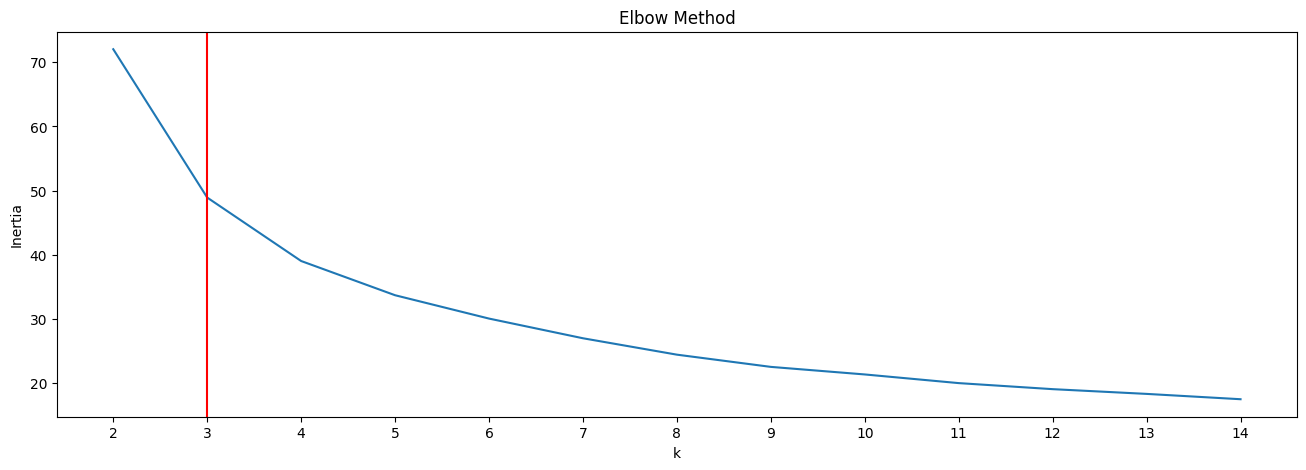

In [ ]:
inertia = []
for k in range(2,15,1):
    kmeans = KMeans(n_clusters = k,random_state = 1234)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    print("Tested kMeans with k = %d\tInertia: %5.4f" % (k, kmeans.inertia_))

figure(figsize = (16,5))
plt.plot(inertia),
plt.xticks(range(0,13,1),range(2,15,1))
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.axvline(1, color = "r")
plt.show()

In [ ]:
pca = PCA(n_components=3)
x_pca_fit = pca.fit_transform(x)
print(x_pca_fit.shape,'\n\n 5 observations of the new df:\n',x_pca_fit[0:5])

(426, 3) 

 5 observations of the new df:
 [[-0.3210681   0.00628468 -0.20549386]
 [ 0.71294676 -0.1572917  -0.19949574]
 [-0.17519207  0.0831262  -0.15714585]
 [-0.18156425  0.39591034  0.00075609]
 [ 0.66638159 -0.07559517 -0.10836747]]


<Axes: >

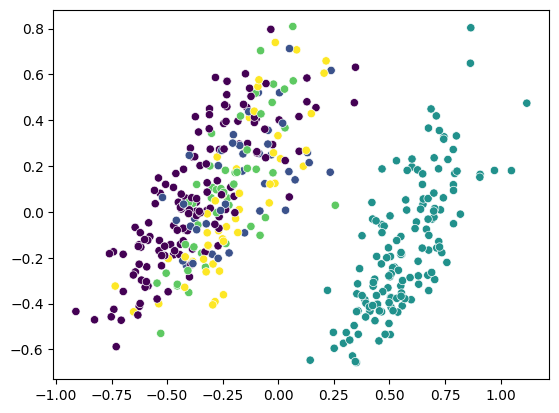

In [ ]:
sns.scatterplot(x=x_pca_fit[:,0], y=x_pca_fit[:,1],c=y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(298, 7) (128, 7) (298,) (128,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_pca_fit, y, test_size = 0.3)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(298, 3) (128, 3) (298,) (128,)


In [ ]:
logreg = LogisticRegression(max_iter=500,random_state=0)
logreg.fit(x_train,y_train)
lr_pred=logreg.predict(x_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, lr_pred)
print(cnf_matrix)

[[40  0  0  0  0]
 [11  0  0  0  1]
 [ 0  0 51  0  0]
 [13  0  0  0  0]
 [11  0  0  0  1]]


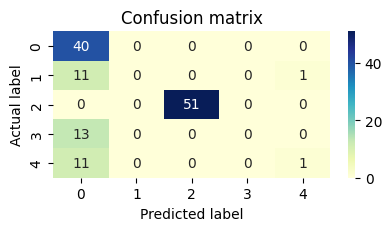

In [ ]:
plt.figure(figsize=(4,2))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70        40
           1       0.00      0.00      0.00        12
           2       1.00      1.00      1.00        51
           3       0.00      0.00      0.00        13
           4       0.50      0.08      0.14        12

    accuracy                           0.72       128
   macro avg       0.41      0.42      0.37       128
weighted avg       0.61      0.72      0.63       128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_test,lr_pred)

0.71875

In [ ]:
y_test

array([1, 0, 2, 3, 0, 0, 3, 3, 0, 2, 0, 4, 2, 2, 3, 2, 1, 2, 2, 3, 0, 0,
       3, 3, 2, 0, 1, 2, 2, 2, 0, 3, 3, 2, 4, 2, 1, 0, 1, 0, 1, 4, 2, 2,
       2, 2, 2, 3, 2, 2, 1, 2, 0, 4, 1, 0, 2, 0, 4, 3, 0, 2, 2, 2, 2, 1,
       0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 4, 0, 2, 1, 4, 3, 2, 2, 0, 2, 4, 0, 2, 4, 2, 4, 0, 4, 2,
       2, 0, 0, 2, 2, 0, 0, 3, 0, 1, 0, 2, 4, 2, 2, 0, 2, 0])

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(x_train, y_train)

pred_knn = knn.predict(x_test)
print(metrics.confusion_matrix(y_test, pred_knn))

print(classification_report(y_test, pred_knn))

[[38  1  0  0  1]
 [ 7  2  0  3  0]
 [ 0  0 51  0  0]
 [ 5  4  0  4  0]
 [ 4  3  0  2  3]]
              precision    recall  f1-score   support

           0       0.70      0.95      0.81        40
           1       0.20      0.17      0.18        12
           2       1.00      1.00      1.00        51
           3       0.44      0.31      0.36        13
           4       0.75      0.25      0.38        12

    accuracy                           0.77       128
   macro avg       0.62      0.53      0.55       128
weighted avg       0.75      0.77      0.74       128



In [ ]:
accuracy_score(y_test,pred_knn)

0.765625

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print(metrics.confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

[[39  0  0  0  1]
 [ 9  0  0  0  3]
 [ 0  0 51  0  0]
 [ 9  0  0  1  3]
 [ 4  0  0  1  7]]
              precision    recall  f1-score   support

           0       0.64      0.97      0.77        40
           1       0.00      0.00      0.00        12
           2       1.00      1.00      1.00        51
           3       0.50      0.08      0.13        13
           4       0.50      0.58      0.54        12

    accuracy                           0.77       128
   macro avg       0.53      0.53      0.49       128
weighted avg       0.70      0.77      0.70       128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_test,pred)

0.765625

In [ ]:
par = {'C': [0.1,1, 10, 100], 'kernel': ['rbf'], 'gamma': [1,0.1,0.01,0.001,0.0001]}


grid = GridSearchCV(SVC(), par , refit = True, verbose = 3)

In [ ]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.644 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.644 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.333 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid_pred = grid.predict(x_test)

print(metrics.confusion_matrix(y_test, grid_pred))

accuracy_score(y_test,grid_pred)

[[39  0  0  0  1]
 [ 7  0  0  1  4]
 [ 0  0 51  0  0]
 [ 6  0  0  4  3]
 [ 3  0  0  1  8]]


0.796875

In [ ]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        40
           1       0.00      0.00      0.00        12
           2       1.00      1.00      1.00        51
           3       0.67      0.31      0.42        13
           4       0.50      0.67      0.57        12

    accuracy                           0.80       128
   macro avg       0.58      0.59      0.56       128
weighted avg       0.73      0.80      0.75       128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_test,grid_pred)

0.796875

In [ ]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2, min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0, random_state=0)

dtc.fit(x_train, y_train)

dtc_pred = dtc.predict(x_test)

print(metrics.confusion_matrix(y_test,dtc_pred))

print(classification_report(y_test,dtc_pred))

[[33  0  0  6  1]
 [ 7  1  0  0  4]
 [ 2  0 48  0  1]
 [ 3  2  0  3  5]
 [ 3  2  0  2  5]]
              precision    recall  f1-score   support

           0       0.69      0.82      0.75        40
           1       0.20      0.08      0.12        12
           2       1.00      0.94      0.97        51
           3       0.27      0.23      0.25        13
           4       0.31      0.42      0.36        12

    accuracy                           0.70       128
   macro avg       0.49      0.50      0.49       128
weighted avg       0.69      0.70      0.69       128



In [ ]:
accuracy_score(y_test,dtc_pred)

0.703125

In [ ]:
k_to_test = range(2,15,1) # [2,3,4, ..., 14]
silhouette_scores = {}

for k in k_to_test:
    model_kmeans_k = KMeans(n_clusters = k,random_state=1234 )
    model_kmeans_k.fit(x)
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(x, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))

print("Done!")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 2	SS: 0.4872


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 3	SS: 0.4111
Tested kMeans with k = 4	SS: 0.3848


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 5	SS: 0.3065
Tested kMeans with k = 6	SS: 0.3060


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 7	SS: 0.2993
Tested kMeans with k = 8	SS: 0.2973


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 9	SS: 0.2895
Tested kMeans with k = 10	SS: 0.2636


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 11	SS: 0.2634
Tested kMeans with k = 12	SS: 0.2581


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tested kMeans with k = 13	SS: 0.2303
Tested kMeans with k = 14	SS: 0.2324
Done!


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


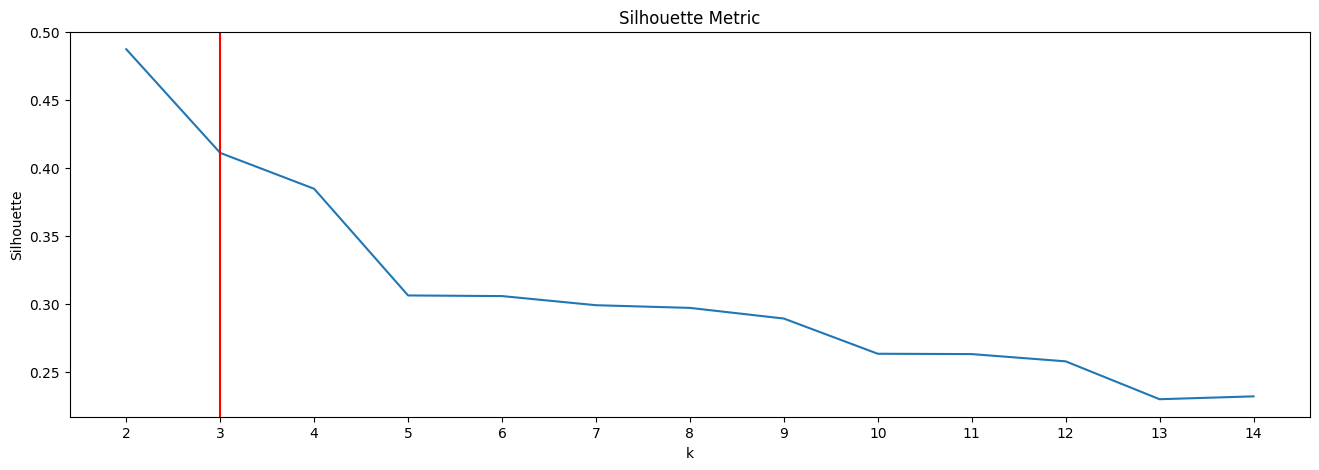

In [ ]:
plt.figure(figsize = (16,5))
plt.plot(silhouette_scores.values())
plt.xticks(range(0,13,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(1, color = "r")
plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
centroids = kmeans_model.cluster_centers_
centroids.shape

(3, 3)

In [ ]:
label = kmeans_model.labels_

In [ ]:
print(confusion_matrix(label,y_train))
print(classification_report(y_train,label))

[[ 0  0 91  1  0]
 [40 16  0 16 19]
 [62 15  0 18 20]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.18      0.52      0.26        31
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00        35
           4       0.00      0.00      0.00        39

    accuracy                           0.05       298
   macro avg       0.04      0.10      0.05       298
weighted avg       0.02      0.05      0.03       298



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


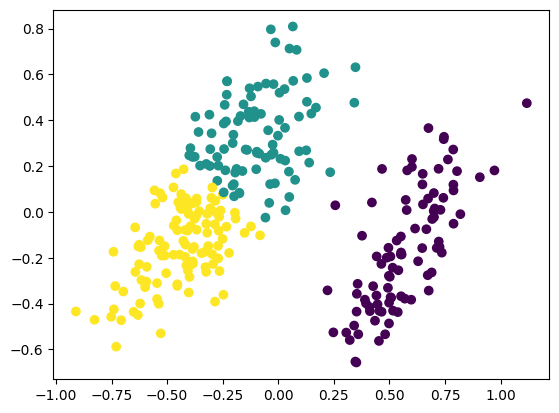

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c=label)
plt.show()

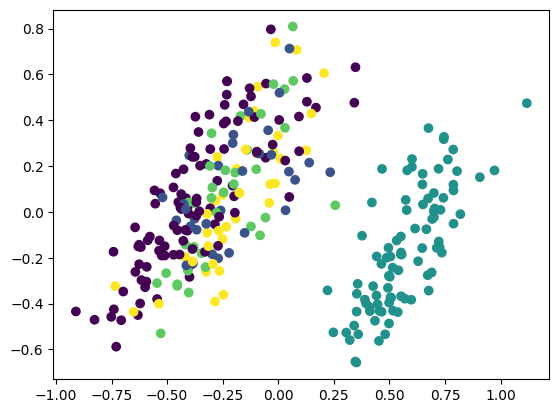

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [ ]:
accuracy_score(y_train,label)

0.053691275167785234

In [ ]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

htc_x = hierarchical_cluster.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
htc_pred = hierarchical_cluster.fit_predict(x_test)

print(metrics.confusion_matrix(y_test,htc_pred))

print(classification_report(y_test,htc_pred))

[[40  0  0  0  0]
 [12  0  0  0  0]
 [ 0 51  0  0  0]
 [13  0  0  0  0]
 [12  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.68        40
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00        12

    accuracy                           0.31       128
   macro avg       0.10      0.20      0.14       128
weighted avg       0.16      0.31      0.21       128



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 i

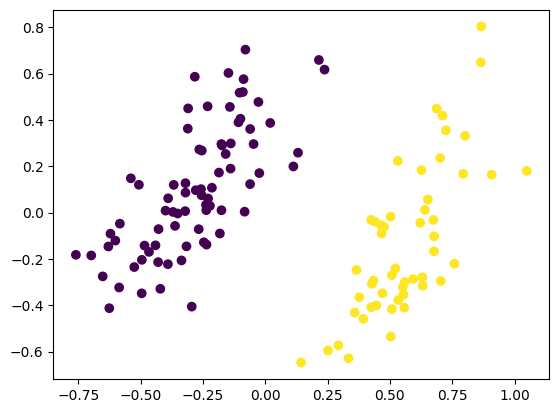

In [ ]:
plt.scatter(x_test[:,0],x_test[:,1], c=htc_pred)
plt.show()

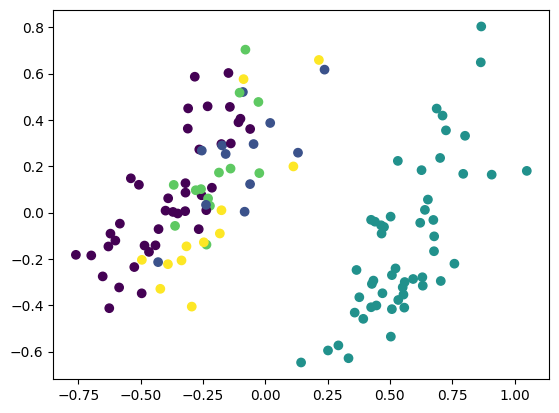

In [ ]:
plt.scatter(x_test[:,0],x_test[:,1], c=y_test)
plt.show()

In [ ]:
accuracy_score(y_test,htc_pred)

0.3125